In [1]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pylab as plt

We start by loading the data set and dividing it between test and training data

In [2]:
movie_reviews_data_folder = r"./data"
dataset = load_files(movie_reviews_data_folder, shuffle=False)

docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

Show target names

In [3]:
dataset.target_names

['neg', 'pos']

`generate_confusion_matrix` method will be use to print a confusion matrix by predicted and target data

In [4]:
def generate_confusion_matrix(y_test, y_predicted, labels):
    cm = metrics.confusion_matrix(y_test, y_predicted)
    
    print("Confusion matrix: ")
    print(cm)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    
    fig.colorbar(cax)
    
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    
    plt.show()

`result_report` method below will be use to listing the best parameters used by classifiers

In [5]:
def result_report(classifier, docs_test, y_test, labels):
    y_predicted = classifier.predict(docs_test)

    print("Mean asserts: ", np.mean(y_predicted == y_test))
    
    print("Classification report: ")
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    cm = metrics.confusion_matrix(y_test, y_predicted)
    generate_confusion_matrix(y_test, y_predicted, labels)
    print("-------------------------------------------")

`run_grid_search` method is responsable to make the parameters tests with received pipeline and your parameters. And so returns the best classifier.

In [6]:
def run_grid_search(pipeline, parameters, docs_train, y_train):
    gs_clf = GridSearchCV(pipeline, parameters, n_jobs=-1)

    gs_clf = gs_clf.fit(docs_train, y_train)

    print("Best score: ", gs_clf.best_score_)

    print("Best parameters: ")
    for param_name in sorted(parameters.keys()):
        print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))
        
    return gs_clf

## MultinomialNB classifier

Below is create a pipeline to:
    - runs `CountVectorizer` to build a bag of words
    - runs `TfidfTransformer` to work with the words frequency
    - uses the `MultinomialNB` classifier

In [7]:
tfidf_pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

Now, is defined what params will be test by the `GridSearchCV`

In [8]:
tfidf_parameters = {'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3, 1e-4, 1e-5),
}

Runs `run grid search` with defined variables above and next see obteds results with `MultinomialNB` classifier

Best score:  0.8386666666666667
Best parameters: 
clf__alpha: 0.01
tfidf__use_idf: False
vect__ngram_range: (1, 2)
Mean asserts:  0.822
Classification report: 
              precision    recall  f1-score   support

         neg       0.85      0.81      0.83       269
         pos       0.79      0.84      0.81       231

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500

Confusion matrix: 
[[217  52]
 [ 37 194]]


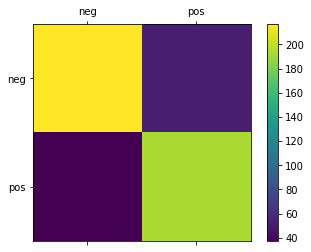

-------------------------------------------


In [9]:
tfidf_classifier = run_grid_search(tfidf_pipeline, tfidf_parameters, docs_train, y_train)
tfidf_results = result_report(tfidf_classifier, docs_test, y_test, dataset.target_names)
tfidf_results

## LinearSVC classifier

Below is made the same processing, but now with the `LinearSVC` classifier

In [10]:
ln_svc_pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
])

In [11]:
ln_svc_parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__random_state': (0, None),
              'clf__tol': (1e-5, 1e-6),
}

Best score:  0.8440000000000001
Best parameters: 
clf__random_state: 0
clf__tol: 1e-05
tfidf__use_idf: True
vect__ngram_range: (1, 1)
Mean asserts:  0.852
Classification report: 
              precision    recall  f1-score   support

         neg       0.88      0.84      0.86       269
         pos       0.83      0.86      0.84       231

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

Confusion matrix: 
[[227  42]
 [ 32 199]]


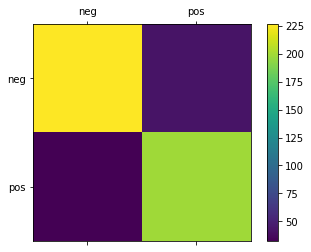

-------------------------------------------


In [12]:
ln_svc_classifier = run_grid_search(ln_svc_pipeline, ln_svc_parameters, docs_train, y_train)
ln_svc_results = result_report(ln_svc_classifier, docs_test, y_test, dataset.target_names)
ln_svc_results

## Conclusion

The two classifiers obtained close results, entertaining or LinearSVC obtained the best result reaching the score of 84% while MultinomialNB registered 83%. <br>
For both classifiers used in the CountVectorizer and TfidfTransformer pipeline, but each classifier used improves results with different parameters: <br>
MultinomialNB: <br>
- CountVectorizer.ngram_range: (1, 2)
- TfidfTransformer.use_idf: False
LinearSVC:
- CountVectorizer.ngram_range: (1, 1)
- TfidfTransformer.use_idf: True

The classification report was also different, as LinearSVC had higher values ​​for both accuracy and recall.
Likewise, a confusion matrix results in very approximate values, generating a graph with the same color intensity.